A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.Use numpy.fft.ifft()to inverse transform the frequency spectrumto time domain signal.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [7]:
audio_file = '/content/drive/MyDrive/mahesh.wav'
signal, sr = librosa.load(audio_file, sr=None)

In [8]:
# Perform FFT to transform the speech signal into the frequency domain
speech_spectrum = np.fft.fft(signal)
# Compute the amplitude spectrum (absolute values of the complex numbers)
amplitude_spectrum = np.abs(speech_spectrum)

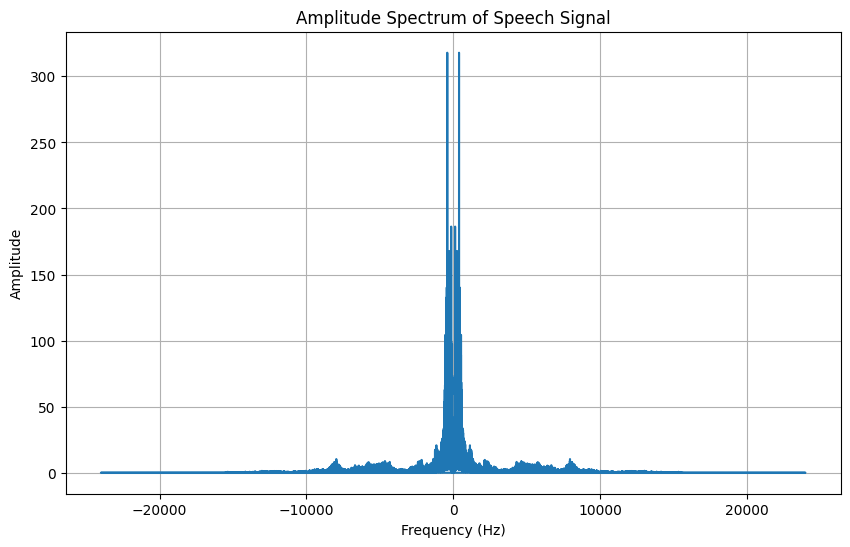

In [9]:
# Plot the amplitude spectrum
plt.figure(figsize=(10, 6))
freq_axis = np.fft.fftfreq(len(signal), 1/sr)  # Frequency axis
plt.plot(freq_axis, amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [10]:
# Inverse FFT to transform the frequency spectrum back to the time domain
reconstructed_signal = np.fft.ifft(speech_spectrum)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


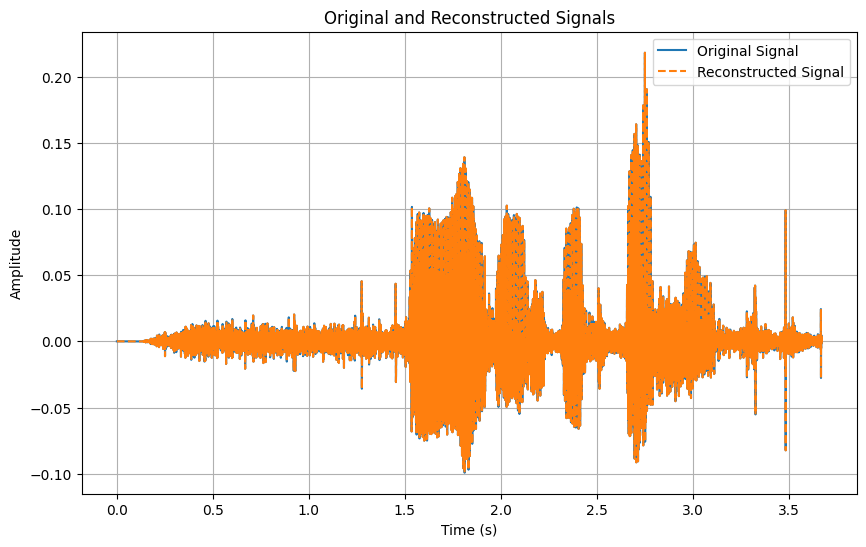

In [11]:
plt.figure(figsize=(10, 6))
time_axis = np.linspace(0, len(signal) / sr, len(signal))
plt.plot(time_axis, signal, label='Original Signal')
plt.plot(time_axis, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title('Original and Reconstructed Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

A2. Use a rectangular window to select the low frequency components from your spectrum.Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import librosa